# Исследование объявлений о продаже квартир в Санкт-Петербурге

**Цель исследования:**
         
1. Определить рыночную стоимость объектов недвижимости
2. Построить атоматизированную систему, которая отследит аномалии и мошенническую деятельность
3. Установить, какие факторы влияют на ценообразование стоимости квартир

**Исследование состоит из следующих этапов:** 
1. Обзор данных
2. Предобработка данных
3. Расчеты и добавление результатов в таблицу
4. Проведение анализа для Санкт-Петербурга и области.
5. Анализ факторов, которые влияют на ценообразование стоимости квартир
6. Написание общего вывода 

## Откройте файл с данными и изучите общую информацию.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb

In [3]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep ='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net//datasets/real_estate_data.csv', sep ='\t')

In [4]:
data.info()
data.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

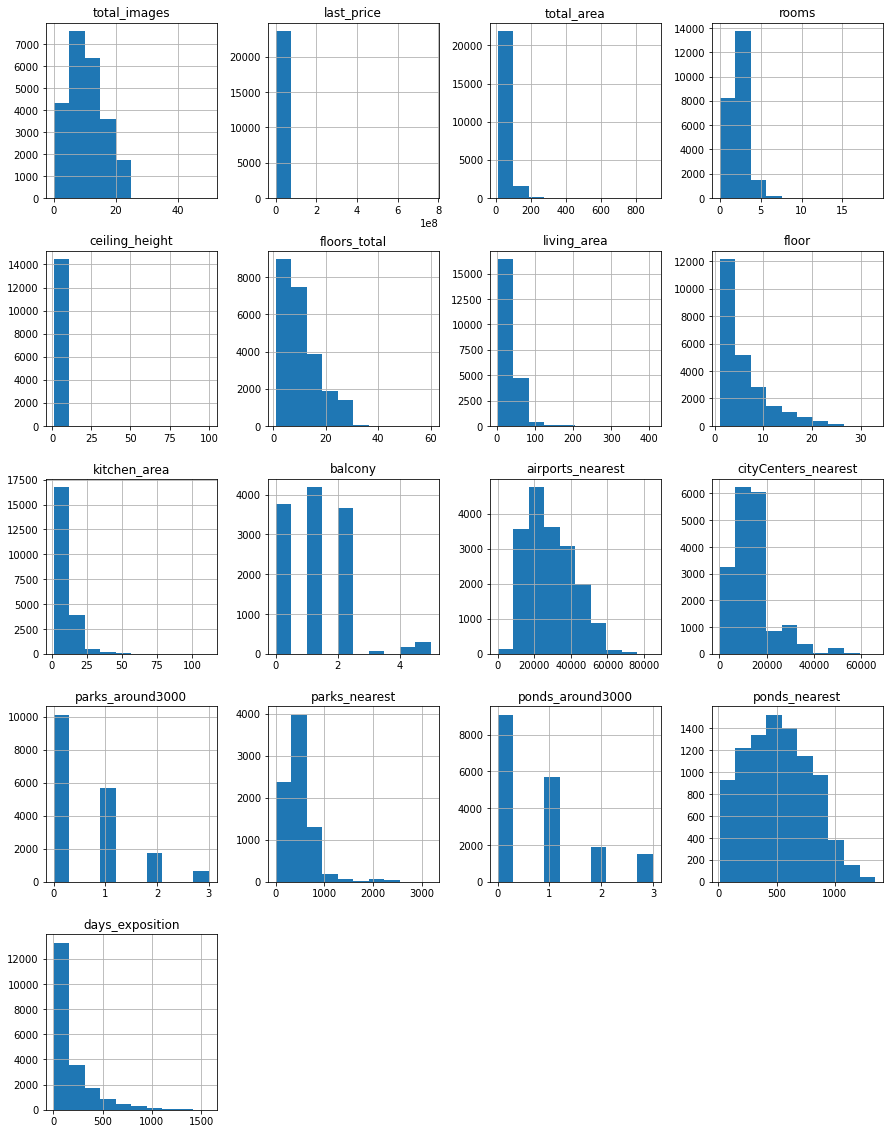

In [5]:
data.hist(figsize=(15, 20))

## Предобработка данных

Определим, в каких столбцах есть пропуски. 
P.S. Если нет никаких зацепок для того, чтобы их заполнить, а удалять не хочется, потому что данные других столбцов потеряются - то лучше оставить пустыми

Посмотрим строки с пропущенными значениями по определённому столбцу 
locality_name 

In [6]:
data['locality_name'].isna().sum()

49

In [7]:
 #удалим строки где пропущены значения в столбце locality_name - всего их 49
data = data.dropna(subset=['locality_name']).reset_index(drop=True)

In [8]:
#проверим, остались ли пропущенные значения
data['locality_name'].isna().sum()

0

In [9]:
data['balcony'].isna().sum()

11513

Если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски заменим на 0 и изменим тип данных на int.

In [10]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype('int')

In [11]:
#посмотрим значения в столбцах для выявления нестандартных значений на первый взгляд и ошибок, 
data['ceiling_height'].value_counts()

2.50     3515
2.60     1645
2.70     1572
3.00     1109
2.80      993
         ... 
4.25        1
3.39        1
3.93        1
10.30       1
4.65        1
Name: ceiling_height, Length: 183, dtype: int64

In [12]:
#посмотрим параметр ceiling_height, видим что есть необоснованно большие значения но пока оставим их как есть
data['ceiling_height'].value_counts()

2.50     3515
2.60     1645
2.70     1572
3.00     1109
2.80      993
         ... 
4.25        1
3.39        1
3.93        1
10.30       1
4.65        1
Name: ceiling_height, Length: 183, dtype: int64

In [13]:
data['ceiling_height'].describe()

count    14490.000000
mean         2.771287
std          1.261593
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [14]:
#медиана от среднего отличается не сильно из-за этих выбросов во всей выборке
#проверим сколько данных с высотой потолков выше 6 метров
data[data['ceiling_height'] > 6].sort_values('ceiling_height')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3470,3,1400000.0,30.0,2018-03-16T00:00:00,1,8.0,5.0,15.3,2,False,...,7.3,0,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0
17412,0,5350000.0,54.0,2015-06-16T00:00:00,2,8.0,5.0,29.0,2,NaN,...,NaN,1,Красное Село,24638.0,28062.0,0.0,NaN,0.0,NaN,469.0
15717,14,5600000.0,67.0,2016-11-11T00:00:00,3,8.0,16.0,41.0,1,NaN,...,8.0,0,Санкт-Петербург,32691.0,11035.0,1.0,723.0,0.0,NaN,474.0
5853,20,5650000.0,45.0,2018-08-15T00:00:00,1,8.3,16.0,19.3,14,NaN,...,8.3,1,Санкт-Петербург,13069.0,10763.0,0.0,NaN,1.0,613.0,14.0
22264,20,5300000.0,45.0,2017-09-30T00:00:00,1,10.3,16.0,15.5,15,NaN,...,NaN,0,Санкт-Петербург,36353.0,11936.0,2.0,440.0,2.0,450.0,136.0
15036,19,5600000.0,56.4,2018-05-11T00:00:00,2,14.0,14.0,32.4,5,NaN,...,9.1,2,Санкт-Петербург,14814.0,13610.0,0.0,NaN,0.0,NaN,315.0
17466,15,6700000.0,92.9,2019-02-19T00:00:00,3,20.0,17.0,53.2,14,NaN,...,12.0,5,Санкт-Петербург,16295.0,15092.0,1.0,967.0,0.0,NaN,NaN
20469,12,5950000.0,60.0,2018-02-19T00:00:00,2,22.6,14.0,35.0,11,NaN,...,13.0,1,Санкт-Петербург,27028.0,12570.0,0.0,NaN,0.0,NaN,40.0
5068,0,3850000.0,30.5,2018-10-03T00:00:00,1,24.0,5.0,19.5,1,True,...,5.5,0,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
355,17,3600000.0,55.2,2018-07-12T00:00:00,2,25.0,5.0,32.0,2,False,...,NaN,2,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0


Тут явно есть ошибки. Высота потолков в среднем составляет 2,77 м, медиана 2,65 м.
Высота потолков в 1 или 100 метров. О данных значениях мы спросим у сотрудников, предоставивших нам выборку данных, для общего изучения данных. Там, где высота потолков больше 20м, видимо пропущена точка, потолки в 10 раз ниже - поделим их на 10.

In [15]:
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] / 10
data['ceiling_height'].unique()

array([ 2.7 ,   nan,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  2.65,  3.2 ,  2.61,  3.25,  3.45,
        2.77,  2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,
        2.47,  2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,
        2.51,  2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,
        2.59,  2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,
        3.55,  3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,
        5.  ,  2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,
        4.7 ,  2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,
        2.3 ,  3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,
        3.95,  3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,
        3.24,  4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,
        3.09,  8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,
        2.68,  3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,
        3.32,  1.2 ,

In [16]:
#проверим сколько пропущенных значений
data['ceiling_height'].isna().sum()

9160

In [17]:
#много, заполним пропуски медианой 
data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()
data['ceiling_height'].isna().sum()

0

In [18]:
#заменим пропуски в days_exposition и заменим тип данных
data['days_exposition'] = data['days_exposition'].fillna(0).astype('int')

In [19]:
#переведем столбец с датой в формат даты без времени, т.к. время не указано
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')

In [20]:
#проверим столбец is_apartment. Какое количество пропущенных значений здесь.
data['is_apartment'].isna().sum()

20890

Много пропущенных значений. Cтолбец апартаменты возможно появился не вместе с началом ведения записей, все пропущенные значения заменим на False

In [21]:
data['is_apartment'] = data['is_apartment'].fillna(False)

In [22]:
#проверим значения столбца 
data['is_apartment'].value_counts()

False    23600
True        50
Name: is_apartment, dtype: int64

In [23]:
#изменим цену на тип int для удобства просмотра
data['last_price'] = data['last_price'].astype('int')
data['last_price']

0        13000000
1         3350000
2         5196000
3        64900000
4        10000000
           ...   
23645     9700000
23646     3100000
23647     2500000
23648    11475000
23649     1350000
Name: last_price, Length: 23650, dtype: int64

In [24]:
data['last_price'].describe().apply(lambda x: '{:.2f}'.format(x))

count        23650.00
mean       6541126.90
std       10896399.18
min          12190.00
25%        3400000.00
50%        4650000.00
75%        6799000.00
max      763000000.00
Name: last_price, dtype: object

In [25]:
data['living_area'].describe()

count    21752.000000
mean        34.448356
std         22.037664
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

In [26]:
data['living_area'].isna().sum()

1898

Пропущенных значения в столбце жилой площади много. Можем заполнить эти данные медианными значениями по группам общей площади квартир (общая площащь квартир связана с жилой). Можно вычесть из общей площади площадь кухни - но во многих строках нет и этих данных. Сложность заключается еще в том, что в общую площадь входит площадь коридора и ванной комнаты, которые мы не знаем. 

In [27]:
data['total_area'].isna().sum()

0

Пропущенных значений в total_area нет, уже хорошо.

Можно рассмотреть вариант для заполнения пропусков кухонных площадей: total_area - living_area, а для жилых площадей: total_area - kitchen_area.
Если пропущены и living_area и kitchen_area, то лучше заменить значения медианными по группам: по площади квартир. Пусть квартиры с площадью до 50м будут в категории малая, от 50 до 100м - средняя, а выше 100м - большая. Создадим функцию и применим ее к столбцу total_area. Далее с помощью цикла пройдемся по каждой из 3х категорий и заполним пропуски в столбце kitchen_area медианными значениями.

In [28]:
def categorize_area(area):
    try:
        if area <= 50:
            return 'малая'
        elif 50 < area <= 100:
            return 'средняя'
        elif area > 100:
            return 'большая'
    except:
        pass
data['total_area_category'] = data['total_area'].apply(categorize_area)

for area in data['total_area_category'].unique():
    data.loc[(data['kitchen_area'].isna()) & (data['total_area_category'] == area), 'kitchen_area'] = data.loc[data['total_area_category'] == area, 'kitchen_area'].median()

data['kitchen_area'].isna().sum()

0

In [29]:
data = data.query('~(total_area < (living_area + kitchen_area))')

In [30]:
#Проверим пропущенные значения в living_area:
data['living_area'].isna().sum()

1898

In [31]:
#используем функцию def categorize_area(area), которую использовали при заполнеии пропущенных значениях в столбце kitchen_area:
for area in data['total_area_category'].unique():
    data.loc[(data['living_area'].isna()) & (data['total_area_category'] == area), 'living_area'] = data.loc[data['total_area_category'] == area, 'living_area'].median()

data['living_area'].isna().sum()

0

In [32]:
# Проверим сколько квартир где общая площадь меньше, чем сумма жилой и кухни.
data.query('total_area < (living_area + kitchen_area)')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_category
322,6,2000000,25.00,2017-02-07,1,2.65,5.0,18.4,5,False,...,0,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,45,малая
546,0,6000001,25.00,2018-11-16,1,3.00,5.0,18.4,5,False,...,0,Санкт-Петербург,25169.0,3871.0,1.0,207.0,1.0,776.0,17,малая
608,2,1850000,25.00,2019-02-20,0,2.65,10.0,18.4,7,False,...,0,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29,малая
780,9,2600000,26.10,2018-02-20,0,2.65,18.0,18.4,8,False,...,1,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,45,малая
1607,12,2150000,20.10,2019-01-30,1,2.65,9.0,18.4,1,True,...,0,Санкт-Петербург,26646.0,12147.0,0.0,NaN,0.0,NaN,13,малая
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21674,11,2540000,23.00,2018-03-22,1,2.65,5.0,18.4,1,False,...,0,Санкт-Петербург,27289.0,7997.0,0.0,NaN,1.0,698.0,45,малая
22134,10,3644640,50.62,2018-12-14,2,2.65,15.0,39.5,1,False,...,0,посёлок Новогорелово,NaN,NaN,NaN,NaN,NaN,NaN,10,средняя
22311,6,2050000,17.20,2019-01-13,1,2.77,23.0,18.4,1,False,...,0,Санкт-Петербург,33645.0,13513.0,0.0,NaN,0.0,NaN,7,малая
22615,6,3150000,24.00,2019-04-16,1,2.65,5.0,18.4,3,False,...,0,Санкт-Петербург,26737.0,5235.0,1.0,359.0,1.0,964.0,0,малая


Не так много. Можем удалить строки, где общая площадь меньше, чем сумма жилой и кухни. Перезапишем таблицу.

In [33]:
data = data.query('~(total_area < (living_area + kitchen_area))')

In [34]:
#уменьшим размер жилой площади до 90% общей площади 
data.loc[data['living_area'] > (data['total_area'] * 0.9), 'living_area'] = data.loc[data['living_area'] > (data['total_area'] * 0.9), 'total_area'] * 0.9

In [35]:
#проверим пропущенные значения в столбце floors_total
data['floors_total'].isna().sum()

78

In [36]:
data['floors_total'].describe()

count    23276.000000
mean        10.628373
std          6.565023
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Из описания по столбцу количества всех этажей в зданиях видно, что максимальное количество - 60. Но 37этажное здание Князь Александр Невский», на сегодняшний день является самым высоким жилым домом Санкт-Петербурга. Нужно проверить все значения в этом столбце.

Text(0, 0.5, 'Number of houses with the specified number of storeys')

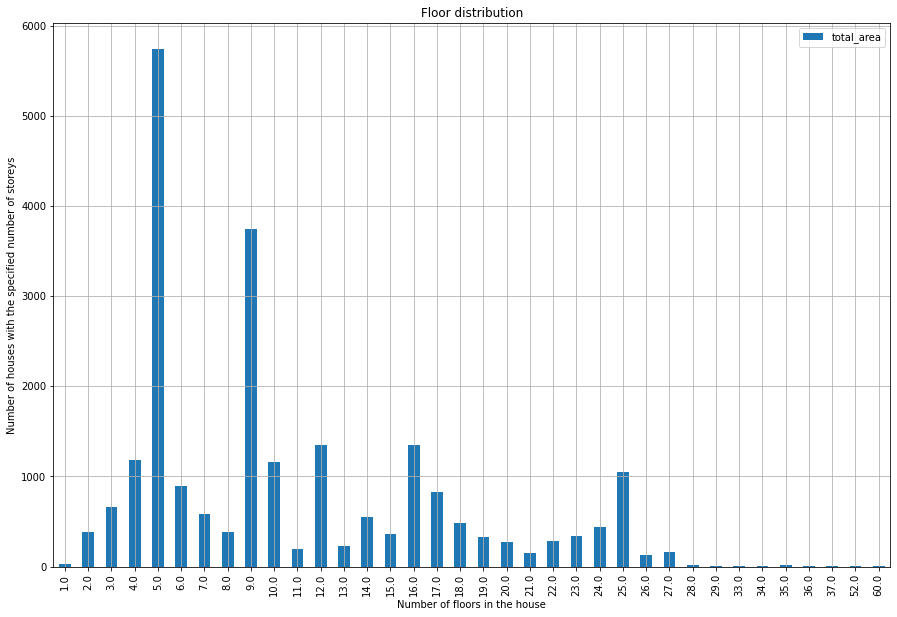

In [37]:
data.pivot_table(index='floors_total', values='total_area', aggfunc='count').plot(kind='bar', grid=True, figsize=(15,10));
plt.title('Floor distribution')
plt.xlabel('Number of floors in the house')
plt.ylabel('Number of houses with the specified number of storeys')

Судя по графику, квартиры находятся в зданиях, не превышающих 37 этажей. Проверим с помощью среза данных, количество этажей больше 37:

In [38]:
data.query('floors_total > 37')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_category
2251,12,3800000,45.5,2018-06-28,2,2.88,60.0,27.4,4,False,...,0,Кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166,малая
16701,9,3978000,40.0,2018-09-24,1,2.65,52.0,10.5,18,False,...,0,Санкт-Петербург,20728.0,12978.0,1.0,793.0,0.0,NaN,45,малая


In [39]:
#удалим эти строки
data = data[data.floors_total < 38]

Исправим значения в столбце floors_total: если этаж квартиры больше количества этажей в доме, то перезапишем этажность дома по этажу квартиры. 

In [40]:
data.loc[data['floors_total'] < data['floor'], 'floors_total'] = data.loc[data['floors_total'] < data['floor'], 'floor']

In [41]:
#проверить, есть ли у нас квартиры, которые удовлетворяют неправильному условию:
data[data['floors_total'] < data['floor']]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_category


Заменим пропущенные значения в столбцах 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest'.
Cоздадим фильтр в цикл, чтобы замены производились только там, где пустые значения есть одновременно в четырёх столбцах.

In [106]:
columns = ['airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest']

for column in columns:
    for location in data['locality_name'].unique():
        data.loc[(data['airports_nearest'].isna()) &
                    (data['cityCenters_nearest'].isna()) &
                    (data['parks_around3000'].isna()) &
                    (data['ponds_around3000'].isna()) &
                    (data[column].isna()) &
                    (data['locality_name'] == location), column] =\
                    data.loc[data['locality_name'] == location, column].median()
#import warnings
#warnings.filterwarnings("ignore")

In [43]:
#посмотрим какие значения есть в столбце locality_name
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Очищаем все наши наименования от "ё" и приводим к нижнему регистру - это поможет нам частично избавиться от "человеческого" фактора, где один пользователь написал с ё, другой с е, либо в разных регистрах

In [44]:
data['locality_name'] = data['locality_name'].str.lower().str.replace('ё', 'е')

Изменим названия в столбце locality_name, чтобы привести их к конкретным категориям, с помощью функции

In [45]:
def get_locality_type(row):
    if pd.isna(row):
        return 'unknown'
    if 'поселок городского типа' in row or 'городской поселок' in row:
        return 'пгт'
    elif 'деревня' in row:
        return 'деревня'
    elif 'поселок' in row:
        return 'поселок'
    elif 'поселок при железнодорожной станции' in row:
        return 'поселок'
    elif 'село' in row:
        return 'село'
    elif 'садоводческое некоммерческое товарищество' in row:
        return 'садоводческое товарищество'
    elif 'садоводческое товарищество' in row:
        return 'садоводческое товарищество'
    elif 'санкт' in row or 'Санкт' in row:
        return 'Санкт-Петербург'
    else:
        return 'прочее'
    
data['locality_type'] = data['locality_name'].apply(get_locality_type)

In [46]:
#очищаем наши наименования от типов и запишем их в новый столбец locality_clean_name
def cleaning_name_type(column):
    clean_names_column = column.str.replace("|".join(["поселок", 
                                                      "деревня", 
                                                      "городского", 
                                                      "типа", 
                                                      "имени", 
                                                      "садоводческое", 
                                                      "товарищество", 
                                                      "некоммерческое",
                                                      "при", 
                                                      "железнодорожной", 
                                                      "станции"    
                                                     ]), "", regex=True).str.strip()
    return clean_names_column
data.insert(loc=15, column='locality_clean_name', value=cleaning_name_type(data['locality_name']))

 Насколько проще код! Спасибо)

In [47]:
data.head(7)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_clean_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_category,locality_type
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0,большая,Санкт-Петербург
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81,малая,поселок
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,средняя,Санкт-Петербург
3,0,64900000,159.0,2015-07-24,3,2.65,14.0,75.2,9,False,...,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424,большая,Санкт-Петербург
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,средняя,Санкт-Петербург
5,10,2890000,30.4,2018-09-10,1,2.65,12.0,14.4,5,False,...,городской янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55,малая,пгт
6,6,3700000,37.3,2017-11-02,1,2.65,26.0,10.6,6,False,...,парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155,малая,поселок


In [48]:
#проверим какие пропущенные значения остались
data.isna().sum().sort_values(ascending=False)

parks_nearest           15306
ponds_nearest           14340
cityCenters_nearest      5384
ponds_around3000         5383
parks_around3000         5383
airports_nearest         5341
total_images                0
balcony                     0
total_area_category         0
days_exposition             0
locality_clean_name         0
locality_name               0
kitchen_area                0
last_price                  0
open_plan                   0
studio                      0
is_apartment                0
floor                       0
living_area                 0
floors_total                0
ceiling_height              0
rooms                       0
first_day_exposition        0
total_area                  0
locality_type               0
dtype: int64

In [49]:
#заполним зачения где комнаты = 0 единицами - это будут студии
data.loc[data['rooms'] == 0, 'rooms'] = 1

In [50]:
#изменим тип данных в floors_total на int
data['floors_total'] = data['floors_total'].astype(int)

In [51]:
#Рассмотрим типы данных в каждом столбце еще раз, осталось ли что-то еще для изменения
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23274 entries, 0 to 23649
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23274 non-null  int64         
 1   last_price            23274 non-null  int64         
 2   total_area            23274 non-null  float64       
 3   first_day_exposition  23274 non-null  datetime64[ns]
 4   rooms                 23274 non-null  int64         
 5   ceiling_height        23274 non-null  float64       
 6   floors_total          23274 non-null  int64         
 7   living_area           23274 non-null  float64       
 8   floor                 23274 non-null  int64         
 9   is_apartment          23274 non-null  bool          
 10  studio                23274 non-null  bool          
 11  open_plan             23274 non-null  bool          
 12  kitchen_area          23274 non-null  float64       
 13  balcony         

## Посчитайте и добавьте в таблицу новые столбцы

цена одного квадратного метра;
день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
месяц публикации объявления;
год публикации объявления;
тип этажа квартиры (значения — «‎первый», «последний», «другой»);
расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [52]:
#Посчитаем цену одного квадратного метра и изменим тип данных на int.
data['price_1m'] = (data['last_price'] / data['total_area']).astype('int')

In [53]:
#добавим день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
#правильный атрибут для поиска дня недели .dt.weekday, 
#также можно использовать метод .dt.day_name(), чтобы вывести словами название дня недели.
data['weekday'] = data['first_day_exposition'].dt.weekday

In [54]:
#добавим месяц публикации объявления
data['month'] = data['first_day_exposition'].dt.month

In [55]:
#добавим год публикации объявления
data['year'] = data['first_day_exposition'].dt.year

In [56]:
#добавим тип этажа квартиры (значения — «первый», «последний», «другой») с помощью функции
def categorize_floor(floor, floors_total):
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'

data['floor_type'] = data.apply(lambda x: categorize_floor(x['floor'], x['floors_total']), axis=1)

In [57]:
#добавим расстояние до центра города в километрах, переведем из м в км и округлим до целых значений.
data['km_to_city_center'] = data['cityCenters_nearest'] / 1000
data['km_to_city_center'] = data['km_to_city_center'].fillna(value=0).astype(int)

In [58]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,total_area_category,locality_type,price_1m,weekday,month,year,floor_type,km_to_city_center
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,755.0,0,большая,Санкт-Петербург,120370,3,3,2019,другой,16
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,NaN,81,малая,поселок,82920,1,12,2018,первый,18
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,574.0,558,средняя,Санкт-Петербург,92785,3,8,2015,другой,13
3,0,64900000,159.0,2015-07-24,3,2.65,14,75.2,9,False,...,234.0,424,большая,Санкт-Петербург,408176,4,7,2015,другой,6
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,48.0,121,средняя,Санкт-Петербург,100000,1,6,2018,другой,8


## Проведите исследовательский анализ данных

### Параметры объектов

Построим диграмму размаха по общей площади.

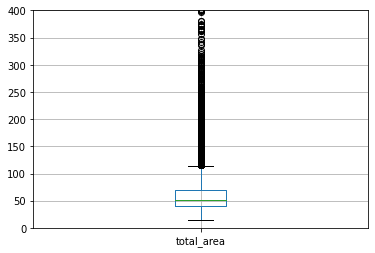

count    23274.000000
mean        60.649747
std         35.678700
min         14.000000
25%         40.200000
50%         52.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64

In [59]:
plt.ylim(0, 400)
data.boxplot(['total_area'])
plt.show()
data['total_area'].describe()

Средняя площадь объектов недвижимости - 60,65 кв.м.
Медианное значение - 52 кв.м. Получается есть квартиры с очень большой площадью, которые смещают среднее ввверх. 
первый квартиль Q1 — 40 кв.м.(25% элементов меньше, а 75% — больше него)
третий квартиль Q3 — 70 кв.м.(75% элементов меньше и 25% элементов больше него)
Минимальная площадь - 14 кв.м. Максимальная - 900 кв.м. Такие объекты недвижимости действительно могут быть, можно убедиться проверив в Циан. Идем дальше.

Общая площадь до 40 кв.м:  5470
Общая площадь от 40 до 60 кв.м:  8689
Общая площадь более 60 кв.м:  8457


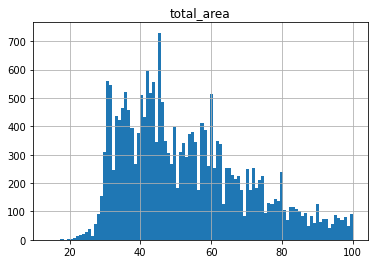

In [60]:
data.hist('total_area', bins=100, range=(14,100))
print('Общая площадь до 40 кв.м: ', data.query('total_area < 40')['total_area'].count())
print('Общая площадь от 40 до 60 кв.м: ', data.query('40 < total_area < 60')['total_area'].count())
print('Общая площадь более 60 кв.м: ', data.query('total_area > 60')['total_area'].count())

По гистограмме видно, что самое большое количество квартир с общей площадью 47 кв.м. - 730.
С площадью до 40 кв.м:  5465; от 40 до 60 кв.м:  8686; более 60 кв.м:  8454.
Чем больше общая площадь - тем меньше квартир.

**Жилая площадь**

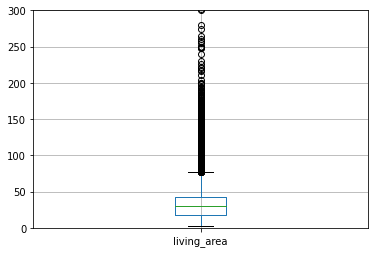

count    23274.000000
mean        34.439807
std         21.702893
min          2.000000
25%         18.400000
50%         30.000000
75%         42.000000
max        409.700000
Name: living_area, dtype: float64

In [61]:
plt.ylim(0, 300)
data.boxplot(['living_area'])
plt.show()
data['living_area'].describe()

Средняя жилая площадь объектов недвижимости - 34,4 кв.м.
Медианное значение - 30 кв.м. 
первый квартиль Q1 — 18,4 кв.м.(25% элементов меньше, а 75% — больше него)
третий квартиль Q3 — 42 кв.м.(75% элементов меньше и 25% элементов больше него)
Минимальная площадь - 2 кв.м. Это странно. Проверим ниже все объекты с жилой площадью менше 8 кв.м.  Максимальная - 409,7 кв.м. 

In [62]:
data.query('living_area < 8')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,total_area_category,locality_type,price_1m,weekday,month,year,floor_type,km_to_city_center
3238,7,4440000,41.0,2017-07-02,1,2.65,17,3.0,17,False,...,NaN,216,малая,Санкт-Петербург,108292,6,7,2017,последний,13
13892,20,6350000,52.0,2018-02-06,2,3.00,6,2.0,2,False,...,1012.0,91,средняя,Санкт-Петербург,122115,1,2,2018,другой,6
16404,13,3799000,31.0,2018-04-12,1,2.60,5,6.0,1,False,...,NaN,168,малая,Санкт-Петербург,122548,3,4,2018,первый,4
17551,11,2680000,22.0,2018-08-11,1,2.65,25,5.0,8,False,...,652.0,70,малая,Санкт-Петербург,121818,5,8,2018,другой,11
19216,19,4050000,33.0,2018-10-15,1,2.50,22,6.5,21,False,...,NaN,44,малая,Санкт-Петербург,122727,0,10,2018,другой,10
21714,0,2330000,23.0,2018-01-01,1,2.65,24,2.0,22,False,...,NaN,66,малая,поселок,101304,0,1,2018,другой,0
21898,15,6100000,77.6,2019-02-28,4,2.50,9,5.4,1,False,...,NaN,33,средняя,Санкт-Петербург,78608,3,2,2019,первый,11
23525,14,64990000,139.0,2015-11-24,3,3.00,8,3.0,8,False,...,100.0,280,большая,Санкт-Петербург,467553,1,11,2015,последний,5


In [63]:
#Удалим эти объекты
data = data.query('living_area > 8')

Жилая площадь до 20 кв.м:  6902
Жилая площадь от 20 до 40 кв.м:  9332
Жилая площадь более 40 кв.м:  6340


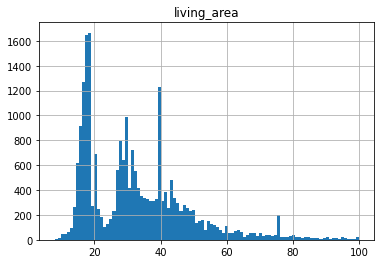

In [64]:
data.hist('living_area', bins=100, range=(8,100))
print('Жилая площадь до 20 кв.м: ', data.query('living_area < 20')['living_area'].count())
print('Жилая площадь от 20 до 40 кв.м: ', data.query('20 < living_area < 40')['living_area'].count())
print('Жилая площадь более 40 кв.м: ', data.query('living_area > 40')['living_area'].count())

Видно, что больше всего квартир с жилой площадью 15-19 кв.м и 39 кв.м (от 600 до 1650) так же в диапазоне от 25 до 35 кв.м (до 1000). А объектов с жилой площадью более 40 кв.м. всего 6340 и количество уменьшается с увеличением жилой площади. Есть небольшой пик на 75к.в. - таких квартир 200.

**Площащь кухни**

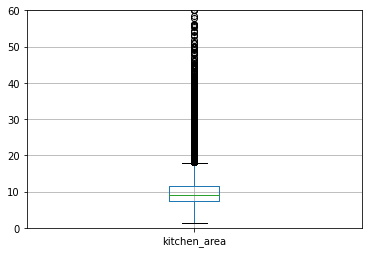

count    23264.000000
mean        10.447632
std          5.655600
min          1.300000
25%          7.300000
50%          9.100000
75%         11.600000
max        112.000000
Name: kitchen_area, dtype: float64

In [65]:
plt.ylim(0, 60)
data.boxplot(['kitchen_area'])
plt.show()
data['kitchen_area'].describe()

Среднняя и медианная площадь кухни: 9,1 и 10,4 кв.м. соответственно. Минимальная 1 кв.м. Максимальная площадь 112 кв.м 
первый квартиль Q1 — 7,3 кв.м.(25% элементов меньше, а 75% — больше него)
третий квартиль Q3 — 11,6 кв.м.(75% элементов меньше и 25% элементов больше него)

Площадь кухни до 10 кв.м:  12662
Площадь кухни от 10 до 15 кв.м:  5671
Площадь кухни более 15 кв.м:  2496


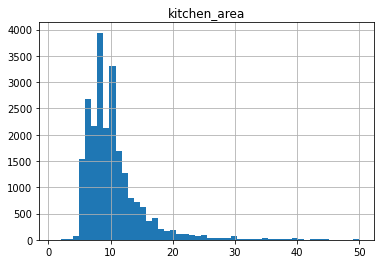

In [66]:
data.hist('kitchen_area', bins=50, range=(1,50))
print('Площадь кухни до 10 кв.м: ', data.query('kitchen_area < 10')['kitchen_area'].count())
print('Площадь кухни от 10 до 15 кв.м: ', data.query('10 < kitchen_area < 15')['kitchen_area'].count())
print('Площадь кухни более 15 кв.м: ', data.query('kitchen_area > 15')['kitchen_area'].count())

**Цена объекта**

По гистограмме видно, что больше всего объектов с площадью кухни от 5 до 10 кв.м (от 1000 до 3600 квартир). 
Пик приходит на 8 кв.м. (3600 квартир). 

In [67]:
data['last_price'].describe()

count    2.326400e+04
mean     6.566932e+06
std      1.092540e+07
min      1.219000e+04
25%      3.450000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [68]:
data['last_price'].describe().apply(lambda x: '{:.2f}'.format(x))

count        23264.00
mean       6566931.85
std       10925403.21
min          12190.00
25%        3450000.00
50%        4650000.00
75%        6800000.00
max      763000000.00
Name: last_price, dtype: object

Среднее значение почти на 2 млн больше чем медианноое. Значит есть очень дорогие квартиры, которые смещают среднюю вверх. 
Сразу бросается в глаза минимальная стоимость жилья - 12190р слишком маленькая цена. Проверим, что это за объект. Возьмем срез сразу меньше 500тыс.р

In [69]:
data.query('last_price < 500000').sort_values(by='last_price')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,total_area_category,locality_type,price_1m,weekday,month,year,floor_type,km_to_city_center
8778,7,12190,109.0,2019-03-20,2,2.75,25,32.0,25,False,...,NaN,8,большая,Санкт-Петербург,111,2,3,2019,последний,9
14886,5,430000,54.0,2018-06-26,2,2.65,3,39.5,3,False,...,NaN,44,средняя,поселок,7962,1,6,2018,последний,0
17426,7,430000,30.4,2019-04-22,1,2.65,2,16.0,1,False,...,NaN,0,малая,прочее,14144,0,4,2019,первый,0
16247,18,440000,40.0,2018-07-10,1,2.65,5,18.4,1,False,...,NaN,45,малая,деревня,11000,1,7,2018,первый,0
5689,7,450000,42.0,2017-07-31,2,2.65,1,23.0,1,False,...,NaN,233,малая,пгт,10714,0,7,2017,первый,0
9565,7,450000,43.4,2018-08-31,2,2.65,5,30.3,3,False,...,NaN,96,малая,деревня,10368,4,8,2018,другой,0
16192,14,450000,38.5,2018-07-11,2,2.65,2,18.4,1,False,...,NaN,45,малая,деревня,11688,2,7,2018,первый,0
17645,0,450000,36.5,2018-02-01,1,2.65,5,17.3,4,False,...,NaN,120,малая,деревня,12328,3,2,2018,другой,0
18834,1,470000,41.0,2018-02-11,1,2.65,5,32.0,3,False,...,NaN,46,малая,деревня,11463,6,2,2018,другой,0
21867,0,470000,37.0,2018-02-18,1,2.65,3,18.4,3,False,...,NaN,45,малая,поселок,12702,6,2,2018,последний,0


Однозначно здесь ошибка. В других объектах недвижимости, стоимость которых менее 500тыс.р, цена оправдана. Они находятся в деревнях и поселках, и площадь маленькая. Удалим эту строку.

In [70]:
data = data.drop(index=[8778])

<AxesSubplot:title={'center':'last_price'}, ylabel='Frequency'>

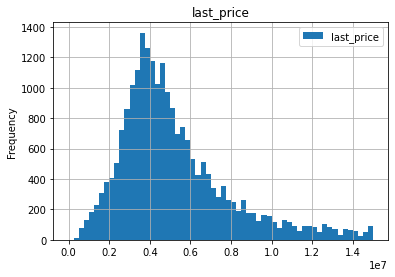

In [71]:
data.plot(y='last_price', kind='hist', bins=60, grid=True, title='last_price', range=(0,15000000), figsize=(6,4))

Из гистограммы видно, что самое большое количество квартир стоимостью от 3 до 5 млн.р. Пик приходится на 3,8-4 млн.р. От 6 млн.р менее 600 вариантов за каждую цену.

**Количество комнат**

1     7950
2     7862
3     5764
4     1171
5      324
6      103
7       59
8       11
9        8
10       3
11       2
14       2
16       1
19       1
12       1
15       1
Name: rooms, dtype: int64

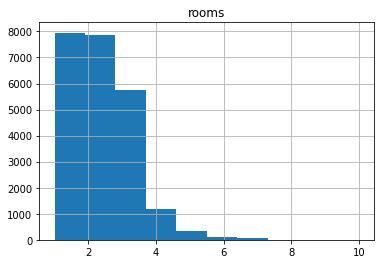

In [72]:
data.hist('rooms', bins=10, range=(1,10))
data['rooms'].value_counts()

Больше всего однокомнатных квартир - 7950, потом идут двухкомнатные - 7862, трехкомнатные - 5764.
Чем больше комнат, тем меньше квартир. 

**Типы этажей

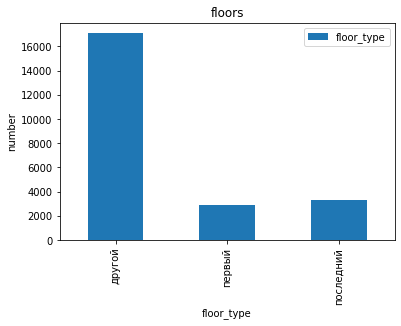

Number of floor types:
другой       17103
последний     3292
первый        2868
Name: floor_type, dtype: int64


In [73]:
data.groupby('floor_type')[['floor_type']].count().plot(kind='bar')
plt.title('floors')
plt.xlabel('floor_type')
plt.ylabel('number')
plt.show()
print('Number of floor types:')
print(data['floor_type'].value_counts())

На первых этажах расположено 2868 квартир, на последнем - 3292. На других - 17103

**Расстояние до центра города в метрах**

<AxesSubplot:>

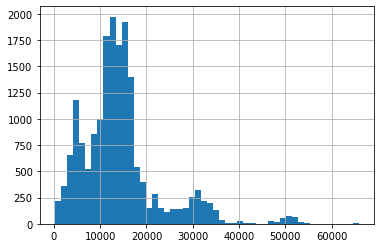

In [74]:
data['cityCenters_nearest'].hist(bins=50)

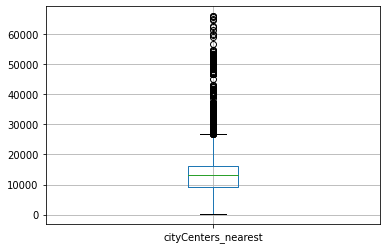

count    17880.000000
mean     14205.296868
std       8628.654271
min        181.000000
25%       9238.000000
50%      13101.000000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

In [75]:
data.boxplot(['cityCenters_nearest'])
plt.show()
data['cityCenters_nearest'].describe()

Среднее расстояние до центра 14,2 км. Медианное - 13,1 км. Первый квартиль - 9,2 км. Третий - 16,3 км.
Максимальная удаленность от центра - 65,6 км. Минимальная - 181 м.
Из гистограммы видно, что максимальное количество квартир от 11 до 18 км до центра (более 1000). Резко уменьшается количество квартир от 18 км от центра.

**Расстояние до аэропорта**

count    17923.000000
mean     28818.061318
std      12622.604955
min          0.000000
25%      18590.500000
50%      26784.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

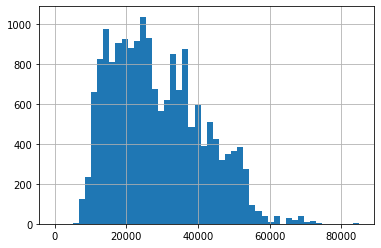

In [76]:
data['airports_nearest'].hist(bins=50)
data['airports_nearest'].describe()

Самое большое количество квартир находится на расстоянии от 10 до 36 км до аэропорта (550-1100 на каждый километр). От 40 км - количество квартир заметно снижается (менее 500 квартир на каждый км.) Среднее значение - 28,8 км. Медианное 26,8 км. Максимальное расстояние - 84,9 км. 

count    7960.000000
mean      490.532538
std       341.211846
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

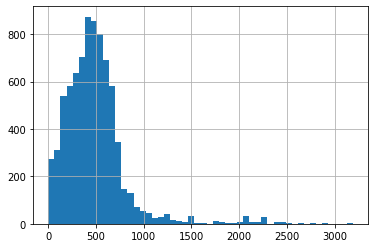

In [77]:
data['parks_nearest'].hist(bins=50)
data['parks_nearest'].describe()

Самое большое количество квартир находятся на расстоянии от 200 до 700 м до парка (300-900 на каждый метр). От 750 м - количество квартир заметно снижается (менее 300 квартир на каждый метр). Среднее значение - 28,8 км. Медианное 26,8 км. Максимальное расстояние - 84,9 км. 

**Год публикации объявления**

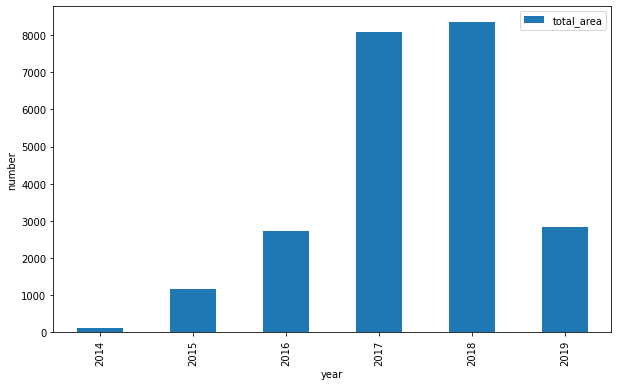

In [78]:
#построим столбиковый график, он лучше подходит для категориальных величин.
data.pivot_table(index='year', values='total_area', aggfunc='count').plot(kind='bar', figsize=(10,6));
plt.xlabel('year')
plt.ylabel('number')
plt.show()

Здесь видно, что больше всего объявлений было в 2017-2018 годах (более 8000). Потом идут 2016 и 2019 (уже значительно меньше: 2500). Меньше всего в 2014 году. 

**День публикации объявления**

<AxesSubplot:xlabel='weekday'>

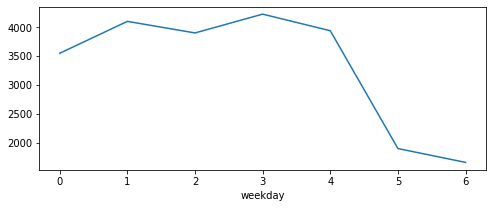

In [79]:
temp = data.groupby('weekday')['weekday'].count()
plt.figure(figsize=(8, 3))
temp.plot()

Меньше всего объявлений публикуют в выходные. В субботу менее 2000. В воскресенье менее 1000. Возможно из-за того, что люди отдыхают в эти дни. Самое большое количество во вторник и четверг (более 4000 в каждый из дней).

**Месяц публикации объявления**

<AxesSubplot:xlabel='month'>

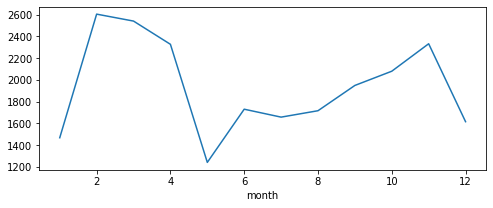

In [80]:
temp = data.groupby('month')['month'].count()
plt.figure(figsize=(8, 3))
temp.plot()

Меньше всего объявялений с мая по август. Меннее 1700 за каждый месяц. Видимо это связано с сезонностью, летом многие уезжают отдыхать на дачу или заграницу. Минимум в мае месяце - всего около 1200 объявлений. Так же мало объявлений в декабре и январе. Это может быть связано с новогодними праздниками.  Самое большое количество объявление в феврале и ноябре - от 2200 за каждый месяц.

**Посмотрим какая зависимость общей и жилой площади**

Text(0, 0.5, 'living_area')

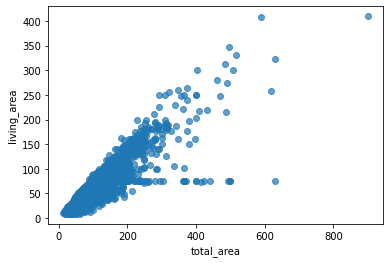

In [81]:
#Если есть линейная зависимость между двумя величинами, то она хорошо просматривается по диаграмме рассеяния:
plt.scatter(x=data['total_area'], y=data['living_area'], alpha=0.7)
plt.xlabel('total_area')
plt.ylabel('living_area')

При увеличении общей площади увеличивается и жилая площадь.

In [82]:
data['total_area'].corr(data['living_area'])

0.9159559627687386

Корреляция большая.

Теперь построим какая зависимость общей площади и кухни

Text(0, 0.5, 'kitchen_area')

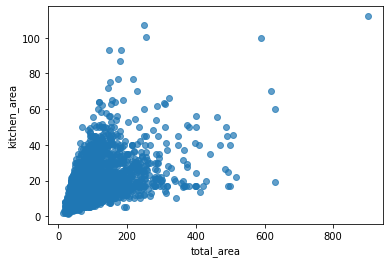

In [83]:
plt.scatter(x=data['total_area'], y=data['kitchen_area'], alpha=0.7)
plt.xlabel('total_area')
plt.ylabel('kitchen_area')

In [84]:
data['total_area'].corr(data['kitchen_area'])

0.6057872642772328

Здесь уже корреляция не такая большая. Но в целом видно, что в большистве квартир чем больше общая площадь, тем больше площадь кухни.

###  Как быстро продавались квартиры (столбец days_exposition).

Text(0, 0.5, 'number')

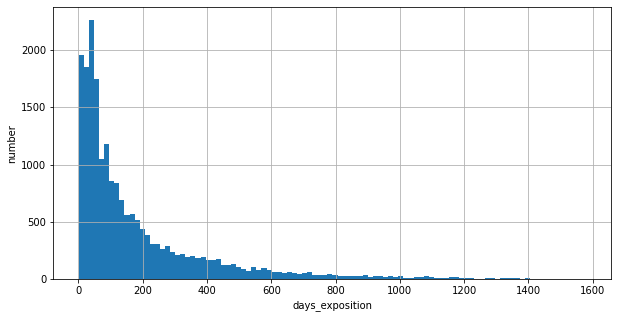

In [85]:
#построим гистограмму
data['days_exposition'].hist(bins=100, figsize=(10,5), range=(1,1580))
plt.xlabel('days_exposition')
plt.ylabel('number')

Видно, что большее количество квартир продается до 100 дней. Особенно до 50 дней. Чем дольше 100 дней, тем меньше таких квартир. 

count    23263.000000
mean       156.953445
std        213.963685
min          0.000000
25%         22.000000
50%         74.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

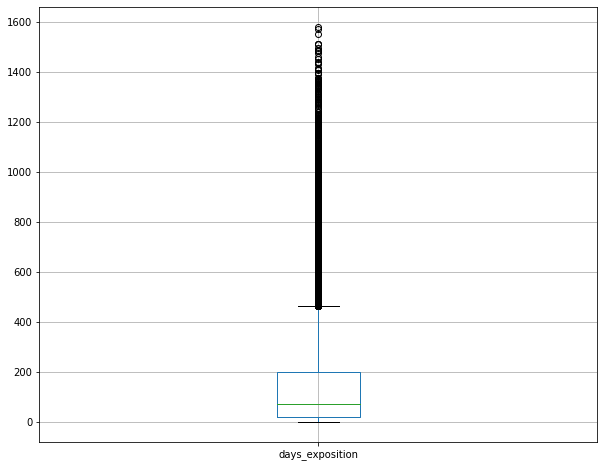

In [86]:
data.boxplot(column='days_exposition', figsize=(10,8))
data['days_exposition'].describe()

 Среднее количество дней размещения объеявлений - 157. Медианное - 74 дня. 
 Первый квартиль - 22 дня. Третий - 199 дней. Максимальное количество - 1580 дней.
 Примерно около 470 дней и выше - это выбросы, значения которые находятся далеко от статистически значимой части данных.

In [87]:
#посмотрим сколько квартир не продано
data.query('days_exposition == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,total_area_category,locality_type,price_1m,weekday,month,year,floor_type,km_to_city_center
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.0,8,False,...,755.0,0,большая,Санкт-Петербург,120370,3,3,2019,другой,16
7,5,7915000,71.60,2019-04-18,2,2.65,24,39.5,22,False,...,NaN,0,средняя,Санкт-Петербург,110544,3,4,2019,другой,11
44,13,5350000,40.00,2018-11-18,1,2.65,22,18.4,3,False,...,1152.0,0,малая,Санкт-Петербург,133750,6,11,2018,другой,11
45,17,5200000,50.60,2018-12-02,2,2.65,9,30.3,7,False,...,NaN,0,средняя,Санкт-Петербург,102766,6,12,2018,другой,12
46,17,6600000,52.10,2019-01-31,2,2.60,24,29.7,9,False,...,NaN,0,средняя,Санкт-Петербург,126679,3,1,2019,другой,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23635,20,21400000,145.00,2018-11-02,4,3.00,26,71.4,17,False,...,NaN,0,большая,Санкт-Петербург,147586,4,11,2018,другой,11
23636,15,2490000,31.00,2019-01-24,1,2.50,5,17.3,5,False,...,NaN,0,малая,прочее,80322,3,1,2019,последний,51
23645,9,9700000,133.81,2017-03-21,3,3.70,5,73.3,3,False,...,381.0,0,большая,Санкт-Петербург,72490,1,3,2017,другой,4
23647,18,2500000,56.70,2018-02-11,2,2.65,3,29.7,1,False,...,NaN,0,средняя,село,44091,6,2,2018,первый,0


Если days_exposition = 0 - значит квартира еще не продана. Таких 3144 квартир.

Text(0, 0.5, 'number')

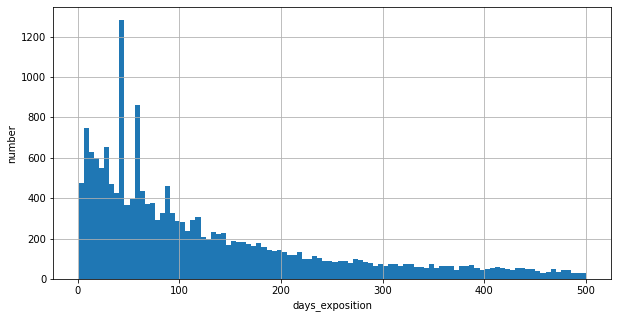

In [88]:
#построим гистограмму еще раз уже без выбросов
data['days_exposition'].hist(bins=100, figsize=(10,5), range=(1,500))
plt.xlabel('days_exposition')
plt.ylabel('number')

Исходя из графиков можно предположить, что быстрые продажи - это до 80 дней. А необычно долгие это более 150-200 дней.

Переходим к следующему шагу: Определим какие факторы влияют на стоимость квартиры.

### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

**Зависимость общей площади, жилой площади, кухни и стоимости объектов недвижимости**

Возьмем квартиры, стоимость которых менее 200 млн р для наглядности. Квартир дороже 200 млн р. совсем немного.

In [89]:
data.query('last_price > 200000000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,total_area_category,locality_type,price_1m,weekday,month,year,floor_type,km_to_city_center
1435,19,330000000,190.0,2018-04-04,3,3.50,7,95.0,5,False,...,285.0,233,большая,Санкт-Петербург,1736842,2,4,2018,другой,1
5883,3,230000000,500.0,2017-05-31,6,2.65,7,75.2,7,False,...,198.0,50,большая,Санкт-Петербург,460000,2,5,2017,последний,5
12950,19,763000000,400.0,2017-09-30,7,2.65,10,250.0,10,False,...,756.0,33,большая,Санкт-Петербург,1907500,5,9,2017,последний,3
13726,7,240000000,410.0,2017-04-01,6,3.40,7,218.0,7,False,...,198.0,199,большая,Санкт-Петербург,585365,5,4,2017,последний,5
14681,15,401300000,401.0,2016-02-20,5,2.65,9,204.0,9,False,...,478.0,393,большая,Санкт-Петербург,1000748,5,2,2016,последний,2
15626,20,300000000,618.0,2017-12-18,7,3.40,7,258.0,5,False,...,198.0,111,большая,Санкт-Петербург,485436,0,12,2017,другой,5
16434,17,245000000,285.7,2017-04-10,6,3.35,7,182.8,4,False,...,140.0,249,большая,Санкт-Петербург,857542,0,4,2017,другой,6
19505,8,420000000,900.0,2017-12-06,12,2.80,25,409.7,25,False,...,318.0,106,большая,Санкт-Петербург,466666,2,12,2017,последний,7
22784,18,289238400,187.5,2019-03-19,2,3.37,6,63.7,6,False,...,188.0,0,большая,Санкт-Петербург,1542604,1,3,2019,последний,1


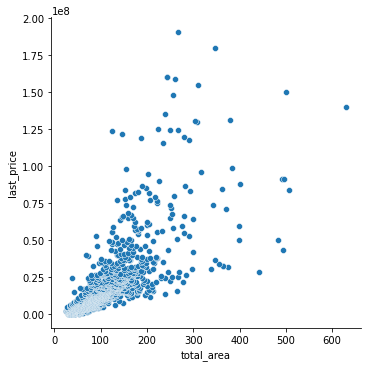

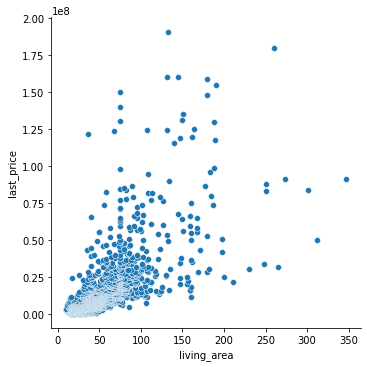

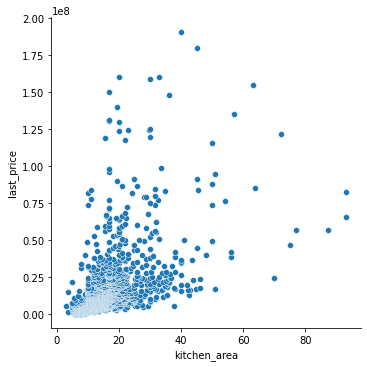

In [90]:
#построим диаграммы рассеивания сразу для 3х столбцов с помощью цикла
price_less2 = data.query('last_price < 200000000')
price_area = price_less2.pivot_table(index='last_price', values=(['total_area', 'living_area', 'kitchen_area']), aggfunc='median').reset_index()
for row in ['total_area', 'living_area', 'kitchen_area']:
    sns.relplot(data=price_area, x=row, y='last_price', kind='scatter')
   

In [91]:
data['last_price'].corr(data['total_area'])

0.6538604605146484

In [92]:
data['last_price'].corr(data['living_area'])

0.5607812428333907

In [93]:
data['last_price'].corr(data['kitchen_area'])

0.4655891606749222

**Зависимость цены от количества комнат**

<AxesSubplot:xlabel='rooms'>

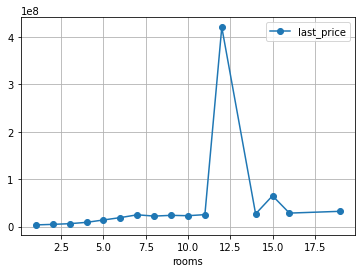

In [94]:
(data.pivot_table(index='rooms',values='last_price',aggfunc='median')
 .plot(y='last_price', style='o-', grid=True)
)

Здесь видна зависимость. Чем больше количество комнат, ты выше цена. Но явно выбивается квартира с 12 комнатами. Посмотрим, что это за объект. 

In [95]:
data.query('rooms == 12')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,total_area_category,locality_type,price_1m,weekday,month,year,floor_type,km_to_city_center
19505,8,420000000,900.0,2017-12-06,12,2.8,25,409.7,25,False,...,318.0,106,большая,Санкт-Петербург,466666,2,12,2017,последний,7


построим линейный график еще раз, только возьмем количество комнат до 12

0.3624487151726607

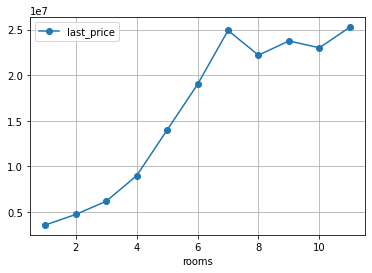

In [96]:
rooms11 = data.query('rooms < 12')
(rooms11.pivot_table(index='rooms', values='last_price',aggfunc='median')
 .plot(y='last_price', style='o-', grid=True)
)
data['last_price'].corr(data['rooms'])

Из графика видно, что зависимость между количеством комнат и ценой квартиры есть, особенно до 7 комнат. Корреляция небольшая, всего 0,362.

<AxesSubplot:xlabel='floor_type'>

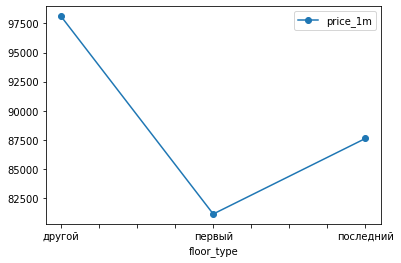

In [97]:
data.pivot_table(index='floor_type', values='price_1m', aggfunc='median').plot(style='o-')

Стоимость 1 кв.м квартир на первом этаже самая низкая, медианная - ниже 82500р, а на последнем - 87500р. Медианная стоимость 1 кв.м на других этажах 97500р.

 **Зависимость цены от даты рамещения(день недели, месяц, год) 
 возьмем стоимость 1 кв.м**

-0.042155730854134994

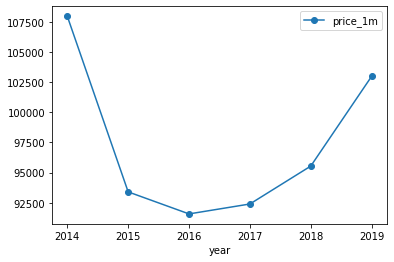

In [98]:
data.pivot_table(index='year', values='price_1m', aggfunc='median').plot(style='o-')
data['last_price'].corr(data['year'])

Стоимость 1 кв.м в 2014 была самой высокой в диапазоне 2014-2019. И медианное значение составяло 107500р. После было снижение цены до 2016г - медианное значение в этом году ниже 92500р. После 2016г пошел небольшой рост цен на жилье вплоть до 2019г. Заметный рост был с 2018 до 2019 (примерно с 95000 до 102500р).

0.0019127637864586413

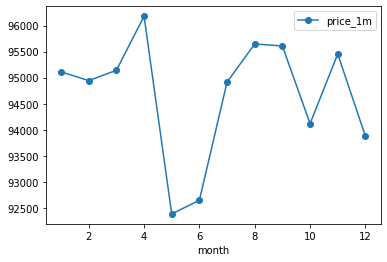

In [99]:
#тут построим столбчатый график методом группирования
data.pivot_table(index='month', values='price_1m', aggfunc='median').plot(style='o-')
data['last_price'].corr(data['month'])

Самая низкая цена в объявлениях размещенных в мае и июне - медианное значение чуть ниже и выше 92500р соответственно. Самая высокая цена за 1кв.м у квартир, размещенных в апреле, медианное занчение - 96000р. Даллее идут месяцы с июля по сентябрь и ноябрь (медианное значение около 95000р).

0.0017864754636739216

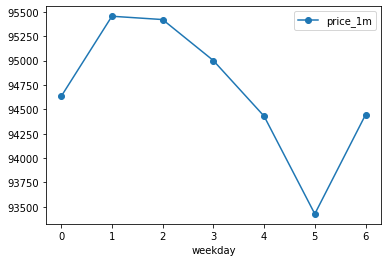

In [100]:
data.pivot_table(index='weekday', values='price_1m', aggfunc='median').plot(style='o-')
data['last_price'].corr(data['weekday'])

Самая низкая цена в объявлениях размещенных в субботу - медианное значение 93500р. Максимальная - во вторник и среду, медианное значение чуть меньше 95550р за 1 кв.м.

Корреляция Пирсона цены от даты рамещения(день недели, месяц, год) очень низкая, зависимости нет.

### Cредняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. 

<div class="alert alert-info"> Посмотрим Топ 10 населённых пунктах с наибольшим числом объявлений и среднюю стоимость 1 кв.м. <div

In [101]:
(data
    .pivot_table(index='locality_clean_name', values='price_1m', aggfunc=[lambda x: round(x.mean()), 'count']).droplevel(level=1, axis=1)
    .sort_values('count', ascending=False).rename(columns={'<lambda>': 'mean price for 1sq m', 'count': 'number of ads'})
   .head(10)
)

,mean price for 1sq m,number of ads
locality_clean_name,,
санкт-петербург,114664,15476
мурино,85415,547
кудрово,94909,446
шушары,78326,434
всеволожск,68638,390
пушкин,103125,369
колпино,75387,336
парголово,90135,326
гатчина,68625,303


Самое большое количество объявлений в Санкт_Петербурге - 15476. Меньше всего в Топ 10 в Выборге - 234.

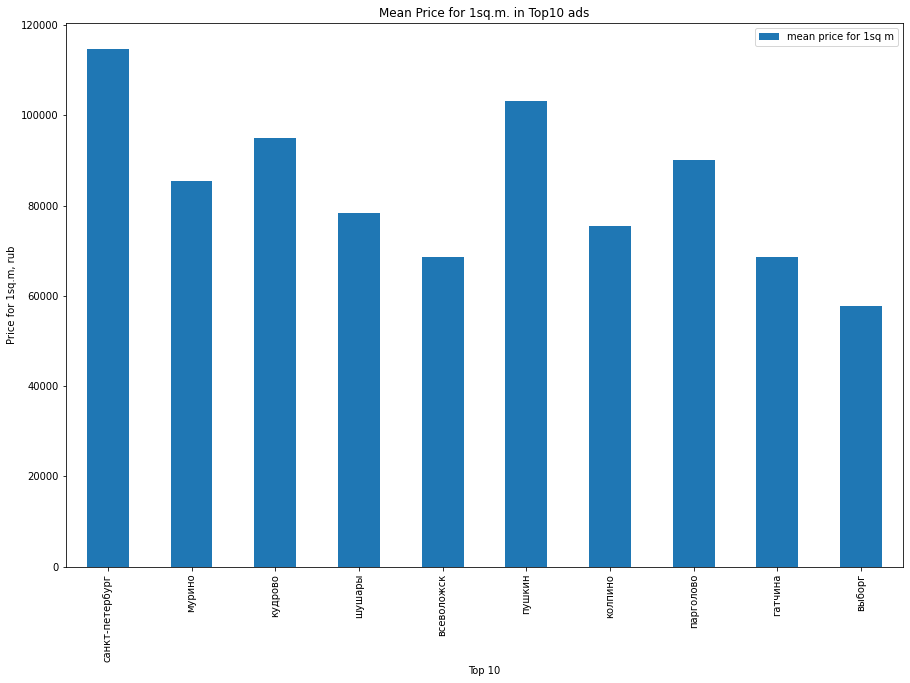

In [107]:
(data
    .pivot_table(index='locality_clean_name', values='price_1m', aggfunc=[lambda x: round(x.mean()), 'count']).droplevel(level=1, axis=1)
    .sort_values('count', ascending=False).rename(columns={'<lambda>': 'mean price for 1sq m', 'count': 'number of ads'})
   .head(10)
).plot(y='mean price for 1sq m', kind='bar', figsize=(15,10))
plt.title('Mean Price for 1sq.m. in Top10 ads')
plt.xlabel('Top 10')
plt.ylabel('Price for 1sq.m, rub')
plt.show()

<div class="alert alert-info"> Самая высокая стоимость 1 кв.м в Санкт-Петербурге - средняя 114664р. Далее идет город Пушкин: 103125р. Затем Парголов, стоимсть 90135р. Меньше всего из Топ10 в Выборге - средняя стоимость 1 кв.м здесь 57813р. 
    <div

А если взять все данные? Посмотрим Топ10 по средней цене за 1 кв.м.

In [103]:
data.pivot_table(index='locality_clean_name', values='price_1m', aggfunc='mean').sort_values('price_1m', ascending=False).head(10)

,price_1m
locality_clean_name,
зеленогорск,115122.500000
санкт-петербург,114664.078509
репино,104238.500000
пушкин,103125.373984
сестрорецк,101693.560440
лисий нос,100660.333333
мистолово,98549.545455
левашово,96997.000000
кудрово,94908.533632


Тут в топе находится уже город Зеленогорск, затем Санкт-Петербург, Репино, Пушкин, Сестрорецк. А десятку замыкает Парголово.

### Среднняя цена каждого километра. Как стоимость объектов зависит от расстояния до центра города.

Text(0, 0.5, 'Mean price, mil.r')

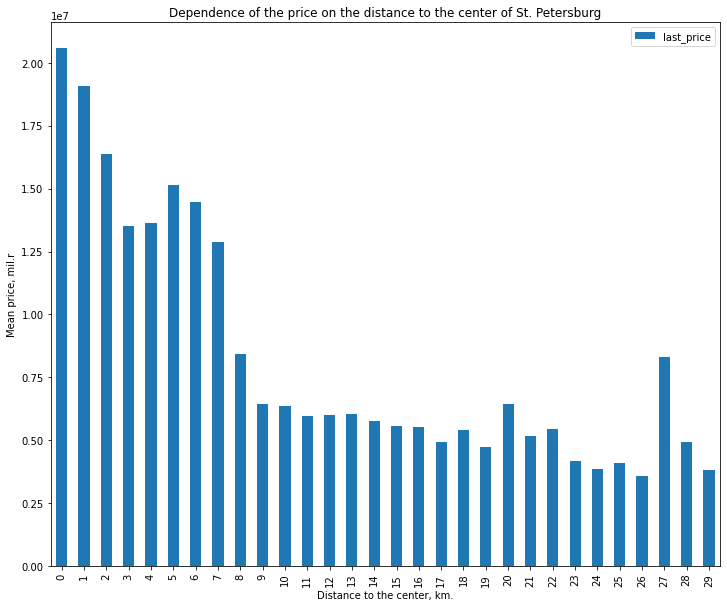

In [104]:
data[data['locality_name'] == 'санкт-петербург'].pivot_table(index='km_to_city_center', values='last_price', aggfunc='mean').plot(kind='bar', figsize=(12,10))
plt.title('Dependence of the price on the distance to the center of St. Petersburg')
plt.xlabel('Distance to the center, km.')
plt.ylabel('Mean price, mil.r')

Чем ближе к центру, тем выше стоимость 1 кв.м. Средння стоимость 1 кв.м квартир, которые находятся до 2км от центра, превышает 1,6 млн руб. Заметно ниже стоимость у квартир от 8 км до центра (800 тыс.р) - идет плавное снижение до 19 км. 
Из графика выбиваются объекты, которые находятся до 27 км от центра. Посмотрим их.

In [105]:
data[(data['locality_name'] == 'санкт-петербург') & (data['km_to_city_center'] == 27)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,total_area_category,locality_type,price_1m,weekday,month,year,floor_type,km_to_city_center
748,13,14350000,74.0,2017-11-28,2,3.13,5,30.0,3,False,...,NaN,128,средняя,Санкт-Петербург,193918,1,11,2017,другой,27
5951,6,2250000,32.0,2018-02-27,1,2.65,2,16.5,2,False,...,NaN,178,малая,Санкт-Петербург,70312,1,2,2018,последний,27


Данный выброс случился из-за небольшого количества данных на 27 км (всего 2 объекта), у которых медианная цена получается завышенной: стоимость одной из них 14350000р.

### Общий вывод

В нашем расположении данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах. Была выполнена предобработка данных, а именно: заполнены пропущенные значения, где это возможно и указаны причины, которые могли привести к пропускм в данных. Изменены типы данных, где это было необходимо. Устранены редкие и выбивающиеся значения. Добавлены новые данные: цена одного квадратного метра; день недели, месяц и год публикации объявления; тип этажа квартиры (значения — "первый», «последний», «другой»); расстояние до центра города в километрах. 
Проведен исследовательский анализ данных. Изучены параметры, добавленные пользователем и картографические. Например, к первому типу относятся площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта и ближайшего парка. Посчитана средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Самая высокая стоимость 1 кв.м в Санкт-Петербурге - средняя 114664р. Далее идет город Пушкин: 103125р. И посчитана средняя цена каждого километра.

Исходя из данных предположили, что быстрые продажи квартир - это до 80 дней. А необычно долгие занимают более 150-200 дней. 
Всего не продано 3144 квартир. Самое большое количество квартир стоимостью от 3 до 5 млн.р. Пик приходится на 3,8-4 млн.р. От 6 млн.р количество  квартир плавно уменьшается. Больше всего однокомнатных квартир - 7950, потом идут двухкомнатные - 7862, трехкомнатные - 5764.
Среднее расстояние до центра 14,2 км. Максимальная удаленность от центра - 65,6 км, а минимальная - 181 м.  Самое большое количество квартир находится на расстоянии от 10 до 36 км до аэропорта и  от 200 до 700 м до парка. 

Больше всего влияют на общую (полную) стоимость объекта – площадь квартир и удаленность от центра. 